### Segmentation strategies using opencv and sci-kit image processing libraries with faba bean images
Author: Harpreet Kaur Bargota

Email: harpreet.bargota@agr.gc.ca

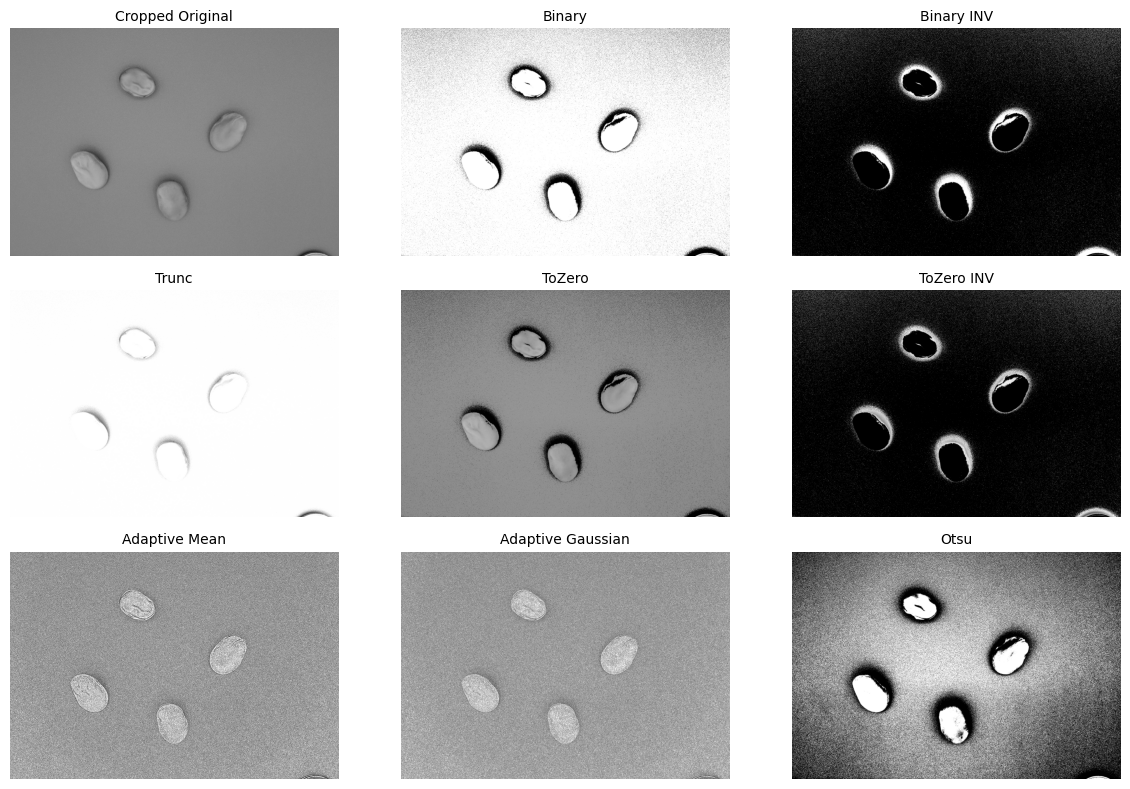

In [1]:
import os
import cv2
import matplotlib.pyplot as plt

# Load image in grayscale
image1 = cv2.imread("/home/AGR.GC.CA/bargotah/pipeline/image1/Faba-Seed-CC_Vf1-1-2.JPG", cv2.IMREAD_GRAYSCALE)

# Crop region of interest
image = image1[2100:4800, 100:4000]

# --- Apply different thresholding techniques ---
_, thresh_binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
_, thresh_binary_inv = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
_, thresh_trunc = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
_, thresh_tozero = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
_, thresh_tozero_inv = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)

# Adaptive thresholding
thresh_adaptive_mean = cv2.adaptiveThreshold(image, 255,
                                             cv2.ADAPTIVE_THRESH_MEAN_C,
                                             cv2.THRESH_BINARY, 11, 2)

thresh_adaptive_gauss = cv2.adaptiveThreshold(image, 255,
                                              cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                              cv2.THRESH_BINARY, 11, 2)

# Otsu’s thresholding
_, thresh_otsu = cv2.threshold(image, 0, 255,
                               cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# --- Collect results ---
titles = [
    "Cropped Original",
    "Binary",
    "Binary INV",
    "Trunc",
    "ToZero",
    "ToZero INV",
    "Adaptive Mean",
    "Adaptive Gaussian",
    "Otsu"
]

images = [
    image,
    thresh_binary,
    thresh_binary_inv,
    thresh_trunc,
    thresh_tozero,
    thresh_tozero_inv,
    thresh_adaptive_mean,
    thresh_adaptive_gauss,
    thresh_otsu
]

# --- Plot all results in a grid ---
plt.figure(figsize=(12, 8))
for i in range(len(images)):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i], fontsize=10)
    plt.axis("off")

plt.tight_layout()

# --- Save the plot to output folder ---
output_folder = "image_segmentation_results"
os.makedirs(output_folder, exist_ok=True)  # create folder if it doesn't exist
plt.savefig(os.path.join(output_folder, "Opencv_results.JPG"),
            bbox_inches="tight", pad_inches=0, dpi=300)

# Show the plot interactively
plt.show()


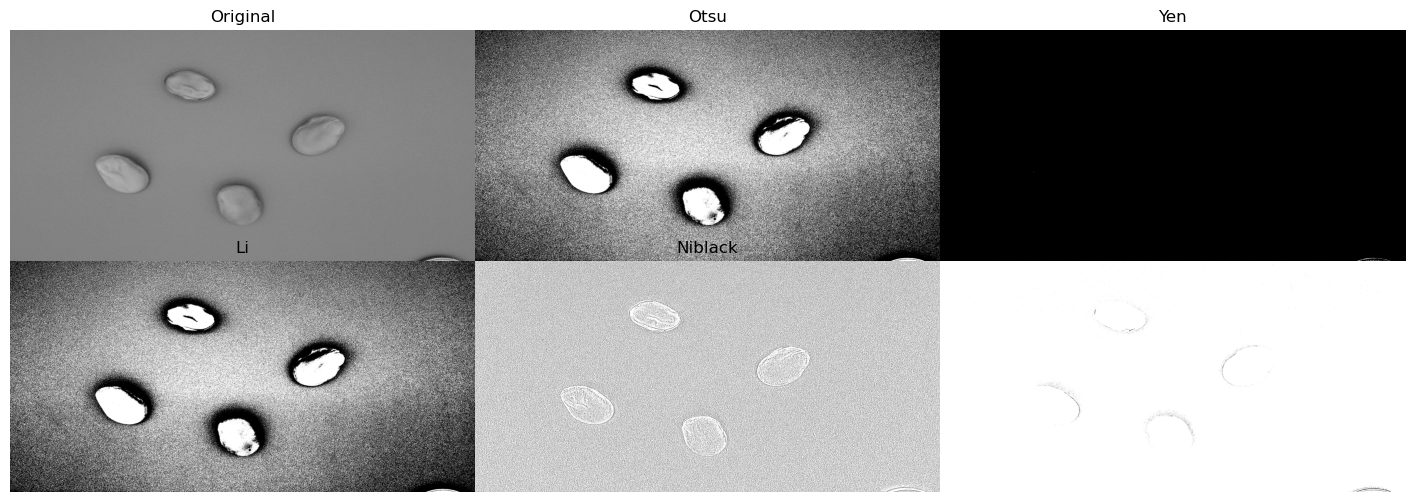

In [2]:
import matplotlib.pyplot as plt
from skimage import data, filters, color, io, util

# # Load grayscale image (replace with your own file if needed)
# image = color.rgb2gray(io.imread("/home/AGR.GC.CA/bargotah/pipeline/image1/Faba-Seed-CC_Vf1-1-2.JPG"))

# image = util.img_as_float(image)
# image = image1[2100:4800, 100:4000]

image1 = cv2.imread("/home/AGR.GC.CA/bargotah/pipeline/image1/Faba-Seed-CC_Vf1-1-2.JPG", cv2.IMREAD_GRAYSCALE)
image = image1[2100:4800, 100:4000]
# --- Thresholding Methods ---

# 1. Global Otsu
thresh_otsu = filters.threshold_otsu(image)
mask_otsu = image > thresh_otsu

# 2. Global Yen
thresh_yen = filters.threshold_yen(image)
mask_yen = image > thresh_yen

# 3. Global Li
thresh_li = filters.threshold_li(image)
mask_li = image > thresh_li

# 4. Local Niblack
mask_niblack = image > filters.threshold_niblack(image, window_size=15, k=0.8)

# 5. Local Sauvola
mask_sauvola = image > filters.threshold_sauvola(image, window_size=15)

# Collect results
titles = [
    "Original",
    "Otsu",
    "Yen",
    "Li",
    "Niblack",
    "Sauvola"
]

images = [
    image,
    mask_otsu,
    mask_yen,
    mask_li,
    mask_niblack,
    mask_sauvola
]

n_images = len(images)
n_cols = (n_images + 1) // 2   # number of columns per row (split roughly in half)

fig, axes = plt.subplots(2, n_cols, figsize=(18, 6))

# Flatten axes for easy iteration
axes = axes.ravel()

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img, cmap="gray", aspect="auto")
    ax.set_title(title, fontsize=12)
    ax.axis("off")

# Hide any unused subplot slots if n_images is odd
for ax in axes[len(images):]:
    ax.axis("off")

plt.subplots_adjust(wspace=0, hspace=0)

# --- Export the plot ---
output_folder = "image_segmentation_results"
# os.makedirs(output_folder, exist_ok=True)  # create folder if it doesn't exist
plt.savefig(os.path.join(output_folder, "Scikit_results.JPG"),
            bbox_inches="tight", pad_inches=0, dpi=300)

plt.show()

